In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from matplotlib.animation import FuncAnimation

In [2]:
import sympy

In [3]:
L=1
m=100

In [4]:
# INITIALIZATIONS
x = np.zeros(m)
u = np.zeros(m)
u_ini = np.zeros(m)

x = np.linspace(0,L,m)

In [5]:
for k in range(len(u_ini)):
        if x[k]>np.median(x):
            u_ini[k]=1

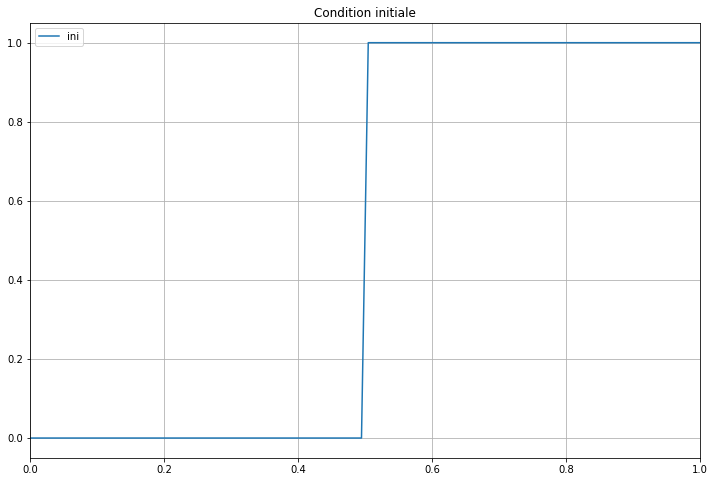

In [7]:
# POST-PROCESSING
plt.figure(figsize=(12,8))
plt.title('Condition initiale', fontsize=12)
plt.xlim(0,L)
plt.plot(x, u_ini,label='ini')    
#plt.plot(x, u[:],label='sol')
plt.grid()
plt.legend()
#plt.savefig('myfig.png', dpi=fig.dpi)
plt.show()

In [11]:
def Min_mod(r):
    retour = 0
    if r > 0:
        retour = min(r,1)
    return retour

def Superbee(r):
    return max(max(min(2*r,1),min(r,2)),0)

def Van_Leer(r):
    return (r + abs(r))/(1+r)

def Van_Albada(r):
    return (r**2 + r)/(1+r**2)

In [14]:
def BW(u,CFL,lim):
    u_shift_minus = np.concatenate((u[-1],u[:-1]),axis=None)
    u_2shift_minus = np.concatenate((u_shift_minus[-1],u_shift_minus[:-1]),axis=None)
    u_shift_plus = np.concatenate((u[1:],u[0]),axis=None)
    r = (u_shift_plus - u / u - u_shift_minus)**-1
    r_shift_minus = (u - u_shift_minus / u_shift_minus - u_2shift_minus)**-1
    
        
    u = u - CFL*(u-u_shift_minus) - CFL/2*(1-CFL)*lim(r)*(u_shift_plus-u)+CFL/2*(1-CFl)*lim(r_shift_minus)*(u-u_shift_minus)
    return u

In [15]:
def LW(u,CFL,lim):
    u_shift_minus = np.concatenate((u[-1],u[:-1]),axis=None)
    u_2shift_minus = np.concatenate((u_shift_minus[-1],u_shift_minus[:-1]),axis=None)
    u_shift_plus = np.concatenate((u[1:],u[0]),axis=None)
    r = u_shift_plus - u / u - u_shift_minus
    r_shift_minus = u - u_shift_minus / u_shift_minus - u_2shift_minus
    
        
    u = u - CFL*(u-u_shift_minus) - CFL/2*(1-CFL)*lim(r)*(u-u_shift_minus)+CFL/2*(1-CFl)*lim(r_shift_minus)*(u_shift_minus-u_2shift_minus)
    return u